# Init

In [2]:
import glob
from tensorflow.python.summary import summary_iterator
def get_events(run, x_axis='step'):
  """Returns event dictionary for given run, has form
  {tag1: {step1: val1}, tag2: ..}

  If x_axis is set to "time", step is replaced by timestamp
  """
  result = {}
  for fname in glob.glob(f'/efs/runs/{run}/events*'):
    print("Parsing "+fname)
    events = summary_iterator.summary_iterator(fname)

    for event in events:
      if x_axis == 'step':
        x_val = event.step
      elif x_axis == 'time':
        x_val = event.wall_time
      else:
        assert False, f"Unknown x_axis ({x_axis})"
        
      vals = {val.tag: val.simple_value for val in event.summary.value}
      # step_time: value
      for tag in vals:
        event_dict = result.setdefault(tag, {})
        if x_val in event_dict:
          print(f"Warning, overwriting {tag} for {x_axis}={x_val}")
          print(f"old val={event_dict[x_val]}")
          print(f"new val={vals[tag]}")

        event_dict[x_val] = vals[tag]
        
  return result

def datetime_from_seconds(seconds, timezone="US/Pacific"):
  """
  timezone: pytz timezone name to use for conversion, ie, UTC or US/Pacific
  """
  return dt.datetime.fromtimestamp(seconds, pytz.timezone(timezone))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# logdir queries

## List runs

In [89]:
!ls /efs/runs

deleteme  deleteme.2018-07-29_14-40-01	deleteme.2018-07-29_15-00-07


## Get events by time

In [80]:
#events_dict=get_events('deleteme.2018-07-29_15-00-07', 'time')
events_dict=get_events('deleteme', 'time')
events = events_dict['image_size']
for key in events:
  print(datetime_from_seconds(key).strftime("%Y-%m-%d_%H-%M-%S"), events[key])

Parsing /efs/runs/deleteme/events.out.tfevents.1532887564.ip-192-168-46-182
2018-07-29_11-06-15 128.0
2018-07-29_11-06-29 224.0
2018-07-29_11-06-44 288.0


## Get events by step

Parsing /efs/runs/deleteme/events.out.tfevents.1532887564.ip-192-168-46-182
Warning, overwriting image_size for step=0
old val=128.0
new val=224.0
Warning, overwriting batch_size for step=0
old val=192.0
new val=192.0
Warning, overwriting image_size for step=0
old val=224.0
new val=288.0
Warning, overwriting batch_size for step=0
old val=192.0
new val=128.0


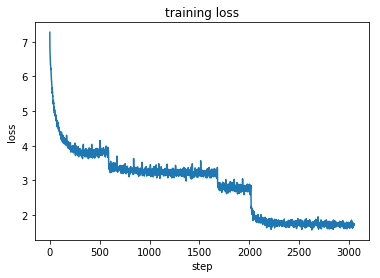

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
events_dict=get_events('deleteme')
events = events_dict['loss/loss']
plt.ylabel('loss')
plt.xlabel('step')
plt.title("training loss")
plt.plot(events.values())

## Get combined cost of evals

In [3]:
run = 'deleteme'
events_dict=get_events(run)
print(f"{sum(events_dict['time/eval_sec'].values())} seconds")

Parsing /efs/runs/deleteme/events.out.tfevents.1532887564.ip-192-168-46-182
Warning, overwriting image_size for step=0
old val=128.0
new val=224.0
Warning, overwriting batch_size for step=0
old val=192.0
new val=192.0
Warning, overwriting image_size for step=0
old val=224.0
new val=288.0
Warning, overwriting batch_size for step=0
old val=192.0
new val=128.0
186.54029941558838 seconds
